In [1]:
import numpy as np
def ForwSub(A,b):
    """
    Esta función calcula la solución de un sistema Ax=b,
    mediante sustitución hacia adelante, donde A es una 
    matriz triangular inferior.
    
    Argumentos:
    A (matriz): Matriz triangular inferior.
    b (vector): Vctor de términos independientes.
    """ 
    #Creamos el vector que contendrá los valores de la solución.
    n = A.shape[0]
    x = np.empty(shape=n)
    #Hallamos el valor de cada x_i
    for i in range(n):
        suma = 0
        #Este ciclo utiliza el valor de x_i, para hallar x_i+1
        for j in range(i):
            suma += A[i][j]*x[j]
        x[i] = (b[i] - suma)/ A[i][i]
    return x

In [2]:
import numpy as np
def BackSub(A,b):
    """
    Esta función calcula la solución de un sistema Ax=b,
    mediante sustitución hacia atrás, donde A es una matriz
    triangular superior.
    
    Argumentos:
    A (matriz): Matriz triangular superior.
    b (vector): Vector de términos independientes.
    """ 
    #Creamos el vector que contendrá los valores de la solución.
    n =  A.shape[0]
    x = np.empty(shape=n)
    #Hallamos el valor de la variable x_i (empezando por x_n)
    for i in range(n-1, -1, -1):
        suma = 0
        #A partir del valor x_i hallamos el valor de x_i-1
        for j in range(n-1, i, -1):
            suma += A[i][j]*x[j]
        x[i] = (b[i] - suma) / A[i][i]
    return x

In [3]:
import numpy as np 
import math 

def Cholesky(A):
    """
    Esta función regresa una matriz triangular inferior B
    tal que la matriz A se puede expresar como el producto
    de B y la transpuesta de B (factorización de Cholesky)

    Argumentos:
    A (matriz) : A es una matriz simétrica 

    Excepciones:
    División entre cero:     si A[j][j] = 0  
    Raiz cuadrada de un numero negativo:     si A[J][J] - suma < 0
    Resultado erroneo:  si A no es simetrica
    """
    #Primero, creamos la matriz B
    n = A.shape[0] 
    B = np.zeros((n,n))
    #Verificamos si la matriz es simetrica
    if not np.array_equal(A, np.transpose(A)):
        print("Error de ejecución: La matriz no es simétrica")
        return 
    #Hallamos los valores de la j-esima columna de B
    for j in range(n):
        suma = 0
        #El siguiente ciclo es para hallar los valores de la diagonal
        for k in range(j):
            suma += B[j][k]*B[j][k]
        #Verificamos que no se calculen raíces cuadradas negativas
        if A[j][j] - suma < 0:
            print("Error de ejecución: Raíz cuadrada negativa")
            return
        else:
            #Asignamos el valor de B en la diagonal
            B[j][j] = math.sqrt(A[j][j] - suma)
        #Hallamos los valores de la iésima fila de B
        for i in range(j+1,n):
            suma = 0
            for k in range(j):
                suma += B[j][k]*B[i][k]
            #Verificamso que no existan divisiones entre cero
            if B[j][j] == 0:
                print("Error de ejecución: División entre cero")
                return
            else:
                #Asigamos el valor de B en la i-esima fila
                B[i][j] = (A[i][j] - suma)/B[j][j]
    return B

In [4]:
import numpy as np
def SolCholesky(A,b):
    """
    Esta función da la solución al sistema Ax=b mediante la 
    factorización de Colesky.
    
    Argumentos:
    A: Es una matriz cuadrada simétrica
    b: Vector de valores independientes
    
    Salida
    x: Vector que contiene la solución del sistema
    """
    # Hallamaos la factorización de A = BBt
    #B = Cholesky(A)
    #Bt = np.transpose(B)
    B = np.linalg.cholesky(A)
    Bt = np.transpose(B)
    # Se resuelven los sistemas By = b  y  Btx=y
    x = BackSub(Bt, ForwSub(B,b))
    return x

In [5]:
import numpy as np
def MinimosCuadradosCholesky(A, b):
    """
    Esta función devuelve la solución al problema de mínimos 
    cuadrados, es decir, encuentra un x tal que Ax sea lo más 
    cercano a b.   
    """
    # Resolvemos la ecuación normal At*A(x) = At*b utilizando la
    # factorización de Cholesky  
    At = np.transpose(A)
    A = np.dot(At, A)
    b = np.dot(At, b)
    x = SolCholesky(A,b)
    return x        

In [6]:
import numpy as np
def Cb(A,b,x):
    """
    Esta función calcula la constante de amplificación de la solución
    x con respecto al error relativo de b
    """
    #Definimos la matriz pseudo-inversa de Moore Penrose (At*A)^-1*At
    At =  np.transpose(A)
    MP = np.dot(np.linalg.inv(np.dot(At, A)), At)
    #Calculamos 
    cb= np.linalg.norm(MP)*((np.linalg.norm(b))/(np.linalg.norm(x)))
    return cb

Inciso 1. 

Las soluciones al problema de mínimos cuadrados son:
x0 = [-1.  1. -1.  1.]
x = [-0.99702893  0.99960685 -0.99417313  0.99691752]
Los errores relativos son: 
0.0036206326393893153
0.0015114589237753243
El coeficiente de amplificación es: 
Cb = 5.929085105066443

 

Incico 2. 

Las soluciones al problema de mínimos cuadrados son:
x1 = [0. 0. 0. 0.]
x = [-0.00408623  0.00263112  0.00136188 -0.00124066]
Los errores relativos son: 
inf
0.00291097410112661
El coeficiente de amplificación es: 
Cb = 1522.6283263143625

 

Inciso 3. 



<ipython-input-7-ce36e58b7039>:59: RuntimeWarning: divide by zero encountered in double_scalars
  error1 = np.linalg.norm(x-x1)/np.linalg.norm(x1)


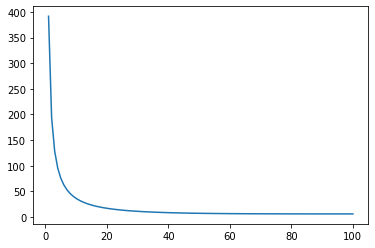

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#Problema 7.1

# Inciso 1

#Definimos la matriz A y el vector b0
A = np.arange(1,7).reshape((3,2), order= 'F')
I = np.array([ [ 1, 0], [0, 1], [0, 0]])
A = np.concatenate((np.concatenate((A,I), axis = 1), 
                    np.concatenate( (-1*I, -1*A), axis=1)), axis=0)
b0 = np.array([2, 4, 3, -2, -4, -3]) 
# Hallamos la solución x asociada al problema de minimos cuadrados con
# respecto a la matriz A y el vector b
x0 = MinimosCuadradosCholesky(A,b0)

# Definimos al vector b como una pequeña variación de b
e = 0.01
b = b0 + e*np.random.rand(len(b0))
# Hallamos la solución x asociada al problema de minimos cuadrados con
# respecto a la matriz A y el vector b
x = MinimosCuadradosCholesky(A,b)

# Calculamos los errores relativos
error1 = np.linalg.norm(x-x0)/np.linalg.norm(x0)
error2 = np.linalg.norm(b-b0)/np.linalg.norm(b0)

# Calculamos el coeficiente de amplificación
cb = Cb(A,b,x)

# Impresión de resultados
print("Inciso 1. \n")
print("Las soluciones al problema de mínimos cuadrados son:")
print("x0 = {}".format(x0))
print("x = {}".format(x))
print("Los errores relativos son: ")
print(error1)
print(error2)
print("El coeficiente de amplificación es: ")
print("Cb = {}".format(cb))

# Inciso 2

# Definimos el vector b1
b1 = np.array([3, 0, -2, -3, 0, 2])
# Hallamos la solución x asociada al problema de minimos cuadrados con
# respecto a la matriz A y el vector b1
x1 = MinimosCuadradosCholesky(A,b1)

# Definimos al vector b como una pequeña variación de b
e = 0.01
b = b1 + e*np.random.rand(len(b1))
# Hallamos la solución x asociada al problema de minimos cuadrados con
# respecto a la matriz A y el vector b
x = MinimosCuadradosCholesky(A,b)

# Calculamos los errores relativos
error1 = np.linalg.norm(x-x1)/np.linalg.norm(x1)
error2 = np.linalg.norm(b-b1)/np.linalg.norm(b1)

# Calculamos el coeficiente de amplificación
cb = Cb(A,b,x)

# Impresión de resultados
print("\n \n")
print("Incico 2. \n")
print("Las soluciones al problema de mínimos cuadrados son:")
print("x1 = {}".format(x1))
print("x = {}".format(x))
print("Los errores relativos son: ")
print(error1)
print(error2)
print("El coeficiente de amplificación es: ")
print("Cb = {}".format(cb))

# Inciso 3.

CB = []
y = []
for i in range(1, 101):
    k = i/100
    y.append(i)
    b2 = k*b0 + (1-k)*b1
    x2 = MinimosCuadradosCholesky(A,b2)
    CB.append(Cb(A,b2,x2))
print("\n \n")
print("Inciso 3. \n")
plt.plot(y,CB) 

In [8]:
def House(v):
    """
    Esta función regresa la matriz de Householder
    H de n por n asociada al vector v de dimensión n
    """
    n = len(v)
    norm = np.linalg.norm(v)
    I = np.identity(n)
    vt = np.transpose(v)
    H = I - (2/norm**2)*(np.dot(vt,v))
    return H

In [9]:
def Householder(A):
    """
    Esta función realiza la factorización A=QR mediante el
    algoritmo de Householder.  Donde Q es una matriz ortogonal
    y R es una matriz triangular superior cuya diagonal son enteros
    positivos
    
    Argumentos:
    A(matriz de mxn): Matriz a factorizar con mas filas que columnas
    
    Salida
    (Q,R): Tupla que contiene las matrices Q y R respectivamente
    """
    # Hallamos el número de filas m y columnas n
    (m, n) = np.shape(A)
    I = np.identity(n)
    # Paso 1 
    # Verificamos si en la primera columna a1 existen ceros por 
    # debajo del primer elemento
    if  np.array_equiv(A[1: , 0], np.zeros((m-1, 1))):
        Hk = I
    else:
        a1 = A[:, 0]
        norm1 = np.linalg.norm(a1)
        e1 = np.zeros((m,1))
        e1[0] = norm1
        Hk = House(a1 + e1)
    #  Inicializamos las matrices Ak y Q
    Ak = A
    Q = Hk
    Ak = np.dot(Hk, Ak)
    #Paso k
    for k in range(1, n):
        Ceros = np.zeros((m-k-1, 1))
        # Verificamos si en la columna ak solo hay ceros por debajo
        # del elemento akk de ser cierto la la k-ésima matriz de 
        # Householder será la matriz identidad
        if np.array_equiv(A[k+1:, k], Ceros):
            Hk = I
        # Si no se cumple lo anterior, construimos la k-ésima matriz 
        # de Householder
        else:
            # ak es el vector de tamaño (m-(k-1)) de las ultimas m+1-k
            # entradas del vector k-ésimo de Ak
            ak =  A[k:,k]
            # Construimos la k-ésima matriz de HouseHolder Hk la cual
            # esta compuesta por cuatro submatrices
            #Matriz superior izquierda
            Ik = np.identity(k)
            # Matriz superior derecha
            CerosUp = np.zeros((k ,m-k))
            # Matriz inferior izquierda
            CerosDown = np.zeros((m-k,k))
            # Hallamos la matriz Householder Hw =H(ak + norm(ak)ek) que
            # será la matriz inferior derecha de Hk
            ek = np.zeros((m-k,1))
            ek[0] = np.linalg.norm(ak)
            Hw = House(ak + ek)
            # Concatenamos las cuatro matrices para formar Hk
            HkU = np.concatenate((Ik, CerosUp), axis = 1)
            HkD = np.concatenate((CerosDown, Hw), axis = 1)
            Hk = np.concatenate((HkU, HkD), axis = 0)
        # Actualizamos la matriz Ak que eventualmente será R
        Ak = np.dot(Hk, Ak)
        # Actualizamos la matriz Q donde Q = H1 H2 ... Hm
        Q = np.dot( Q, Hk)
    R = Ak
    return Q, R

In [10]:
def MinimosCuadradosHouseholder(A, b):
    """
    Esta función devuelve la solución al problema de mínimos 
    cuadrados, es decir, encuentra un x tal que Ax sea lo más 
    cercano a b utilizando el método de Householder 
    """ 
    # Hallamos la factorización A = QR
    #Q,R = Householder(A)
    Q, R = np.linalg.qr(A)
    m,n = np.shape(A)
    # Como Q es ortogonal Q^-1 = Q^t 
    Qinv = np.transpose(Q)
    b = np.dot(Qinv, b)
    b = b[0:n]
    R = R[0:n,:]
    # Resolvemos el sistema Rx = Q^-1 b
    x = BackSub(R, b)
    return x

In [11]:
import math

def FactSVD(A):
    """
    Esta función calcula las matrices U, D y V tales que 
    A = UDV^T mediante la descomposición de valores singulares

    Argumentos:
    A: Matriz de m por n que se desea factorizar

    Salida
    (U, D, V): Matrices de la factorizacón
    """
    m, n = np.shape(A)
    B = np.dot(np.transpose(A), A)
    # Hallamos los valores y vectores propios de B
    valores, V = np.linalg.eig(B)
    # Creamos la matriz D
    D = np.zeros((m, n))
    k = np.minimum(m, n) - np.isclose(valores, 0).sum()
    # Rellenamos la matriz D
    for i in range(k):
        D[i, i] = np.sqrt(valores[i])
    # Creamos la matriz U
    U = np.zeros((m, n))
    for i in range(k):
        U[:, i] = 1/(D[i, i] * np.dot(A, V[:, i]))
    return (U, D, V)
    

In [12]:
def MinimosCuadradosSVD(A, b):
    """
    Esta función devuelve la solución al problema de mínimos 
    cuadrados, es decir, encuentra un x tal que Ax sea lo más 
    cercano a b mediante el método SVD
    """  
    A = np.array(A)
    b = np.array(b)
    U,s,V = np.linalg.svd(A)
    n, m = np.shape(A)
    r = 1
    while r < m and abs(s[r]) >= 1e-14:
        r = r+1
    y = U.transpose().dot(b)
    for i in range(r):
        y[i] = y[i]/s[i]
    y = y.reshape((n,))
    y = np.concatenate((y[0:r],np.zeros((m-r,))),axis=0)
    x = V.transpose().dot(y)
    return(x)

In [13]:
def MatRank(m,n,r):
    """
    Esta función regresa una matriz real de tamaño mxn y rango r
    
    Argumentos:
    m(entero positivo) el número de filas que queremos
    n(entero positivo) el número de columnas que queremos
    r(entero positivo) el rango de la matriz A que queremos
    
    Salida:
    A (matriz de mxn) Matriz mxn de rango r
    """
    # Hallamos el valor mas pequeño entre m y n
    if m <= n:
        minimo = m
        maximo = n
    else:
        minimo = n
        maximo = m
    # Verificamos que sea posible contruir la matriz A, es decir que el rango no
    # sea mayor a min(n,m)
    if r > minimo:
        print("Error: El rango no puede ser mas grande que {}".format(minimo))
    #Construimos la matriz deseada
    else:
        # Creamos una matriz de min(n,m)x min(n,m) con valores aleatorios
        A = np.random.rand(minimo,minimo)
        A = A + np.linalg.norm(A,np.inf)
        # Rellenamos la matriz A con los datos faltantes para que tengamos una
        # matriz de tamaño m por n.
        if m >= n:
            # Rellenamos con unos las filas faltantes
            A = np.concatenate((A, np.ones((maximo-minimo,minimo))), axis = 0)
            # Hacemos que los vectores(columna) r,r+1,. . .,minimo-1 sean 
            # linealmente dependientes del vector(columna) r-1, esto para que
            # el rango de A sea r
            for k in range(r, minimo):
                A[:, k] = np.random.rand()*A[:, r-1]
        else:
            # Rellanamos con unos las columnas faltantes
            A = np.concatenate((A, np.ones((minimo, maximo-minimo))), axis = 1)
            # Hacemos que los vectores(fila) r, r+1,. . ., minimo-1 sean 
            # linealmente dependientes del vector(fila) r-1, esto para que
            # el rango de A sea r
            for k in range(r, minimo):
                A[k, :] = np.random.rand()*A[r-1, :]
    return A

In [14]:
from timeit import default_timer

# Ejercicio 7.4

# Inicso 1.

# Definimos una matriz A de 300 filas y 100 columnas con rango 100
# y un b un vector aleatorio de 300 elementos
A = MatRank(300, 100, 100)
b = np.random.rand(300,1)

# Inciso a) 

# Solución del problema de mínimos cuadrados tomando la matriz A
# y el vector b mediante factorización de Cholesky
inicio_chol = default_timer()
x1 = MinimosCuadradosCholesky(A,b)
fin_chol = default_timer()
tiempo_chol = fin_chol - inicio_chol
distmin_chol = np.linalg.norm(np.dot(A,x1) -b)

# Inciso b)

# Solución del problema de mínimos cuadrados tomando la matriz A 
# y el vector b mediante factorización QR (método Householder)
inicio_qr = default_timer()
x2 = MinimosCuadradosHouseholder(A,b)
fin_qr = default_timer()
tiempo_qr = fin_qr - inicio_qr
distmin_qr = np.linalg.norm(np.dot(A,x2) - b)

# Inciso c)

# Solución del problema de mínimos cuadrados tomando la matriz A
# y el vector b mediante el método SVD
inicio_svd = default_timer()
x3 = MinimosCuadradosSVD(A,b)
fin_svd = default_timer()
tiempo_svd = fin_svd - inicio_svd
distmin_svd = np.linalg.norm(np.dot(A,x3) - b)

# Impresión de resultados

print("Iniciso 1. \n")
# Cholesky
print("Inciso (a)")
print("Para el método de Cholesky se obtuvieron los siguientes resultados:")
print("Tiempo de ejecución: {}".format(tiempo_chol))
print("Distancia entre la solución y el vector b: {}".format(distmin_chol))
print("\n")
# QR
print("Inciso (b)")
print("Para el método QR se obtuvieron los siguientes resultados:")
print("Tiempo de ejecución {}".format(tiempo_qr))
print("Distancia entre la solución y el vector b: {}".format(distmin_qr))
print("\n")
# SVD
print("Inciso (c)")
print("Para el método SVD se obtuvieron los siguientes resultados:")
print("Tiempo de ejecución {}".format(tiempo_svd))
print("Distancia entre la solución y el vector b: {}".format(distmin_svd))
print("\n")

# Inciso 2)

# Inicializamos los datos 
e = 1e-5
P = np.array([[1, 1, 0],
             [0, 1, -1],
             [1, 0, -1]
             ])
D = np.array([[e, 0, 0],
             [0, 1, 0],
             [0, 0, 1/e]
             ])
A = np.dot(np.dot(P, D), np.linalg.inv(P))
b = [1, 1, 1]

# Resolvemos por el método de Cholesky
inicio_chol = default_timer()
x1 = MinimosCuadradosCholesky(A,b)
fin_chol = default_timer()
tiempo_chol = fin_chol - inicio_chol
distmin_chol = np.linalg.norm(np.dot(A,x1) -b)

# Resolvermos por el método QR
inicio_qr = default_timer()
x2 = MinimosCuadradosHouseholder(A,b)
fin_qr = default_timer()
tiempo_qr = fin_qr - inicio_qr
distmin_qr = np.linalg.norm(np.dot(A,x2) - b)

# Impresión de resultados
print("Inciso 2.\n")

# Cholesky
print("Cholesky")
print("Para el método de Cholesky se obtuvieron los siguientes resultados:")
print("Tiempo de ejecución: {}".format(tiempo_chol))
print("Distancia entre la solución y el vector b: {}".format(distmin_chol))
print("Solución x = {}".format(x1))
print("\n")
# QR
print("QR")
print("Para el método QR se obtuvieron los siguientes resultados:")
print("Tiempo de ejecución {}".format(tiempo_qr))
print("Distancia entre la solución y el vector b: {}".format(distmin_qr))
print("Solución x = {}".format(x2))


Iniciso 1. 

Inciso (a)
Para el método de Cholesky se obtuvieron los siguientes resultados:
Tiempo de ejecución: 0.011982343999989098
Distancia entre la solución y el vector b: 156.9623355375681


Inciso (b)
Para el método QR se obtuvieron los siguientes resultados:
Tiempo de ejecución 0.014446398000018235
Distancia entre la solución y el vector b: 156.9623355135747


Inciso (c)
Para el método SVD se obtuvieron los siguientes resultados:
Tiempo de ejecución 0.008470795999983238
Distancia entre la solución y el vector b: 156.96233551357386


Inciso 2.

Cholesky
Para el método de Cholesky se obtuvieron los siguientes resultados:
Tiempo de ejecución: 0.0002420949999759614
Distancia entre la solución y el vector b: 0.577303074582103
Solución x = [4.75382214 0.66665431 4.08718117]


QR
Para el método QR se obtuvieron los siguientes resultados:
Tiempo de ejecución 0.000549380999927962
Distancia entre la solución y el vector b: 7.66312669381364e-07
Solución x = [5.00005337e+04 5.00005263e-01 

In [15]:
import numpy as np
A = np.identity(5)
print(A)
b = np.array_equiv( A[1:, 0], np.zeros((len(A)-1, 1)))
print(b)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
True
